In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Explanatory Power: Assumptions of Linear Regression

In [19]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [3]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[0.04575482 0.18799423]]

Intercept: 
 [2.92109991]

R-squared:
0.8971942610828956


## 4 Assumptions of Linear Regression

- Linear relationship 
    – Inputs have linear relationship with the outcome
- Multivariate normality 
    – Error (real outcomes minus predicted values) is normally distributed, i.e. there are no outlier errors that could potentially skew the data
- Homoscedasticity 
    – Distribution of error terms should be consistent for all predicted values, i.e. variance in error shouldn't be much larger for large vs. small outcomes
- Low Multicollinearity
    - Features should be barely correlated, if at all (multicollinearity can cause the relationship between features and outcomes to be underestimated)

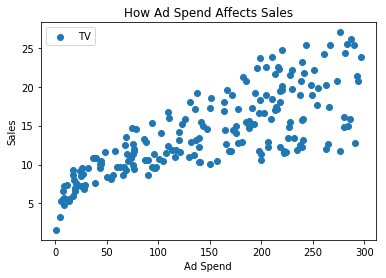

In [40]:
plt.scatter(data['TV'], data['Sales']) # should sqrt the xs
# plt.scatter(data['Radio'], data['Sales'])
# plt.scatter(data['Newspaper'], data['Sales'])

plt.title('How Ad Spend Affects Sales')
plt.legend(['TV', 'Radio'])
plt.xlabel('Ad Spend')
plt.ylabel('Sales')

plt.show()

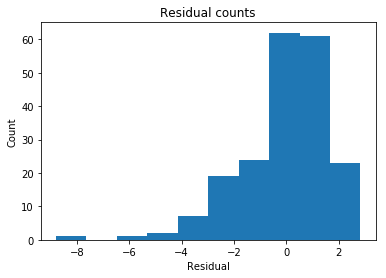

In [5]:
# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error / residual
residual = actual - predicted

# This looks concerning
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

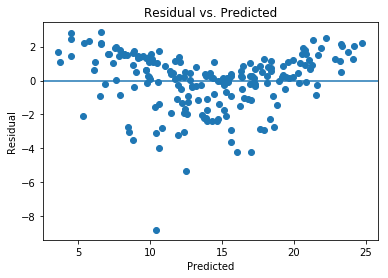

In [6]:
# Also concerning
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Your data has a problem with both heteroscedasticity and multivariate non-normality. How can you fix it?

In [43]:
# Creating column with square-roots of inputs to get more linear relationship
data = data[data['Radio'] > 0]
data['TV sqrt'] = [math.sqrt(x) for x in data['TV']]
xt, _ = stats.boxcox(data['Radio'])
data['Radio Boxcox'] = xt

xt2, _2 = stats.boxcox(data['TV'])
data['TV Boxcox'] = xt2

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV sqrt,Radio 0.7,Radio Boxcox,TV Boxcox
0,1,230.100,37.800,69.200,22.100,15.169,12.713,13.653,71.495
1,2,44.500,39.300,45.100,10.400,6.671,13.064,14.025,20.558
2,3,17.200,45.900,69.300,9.300,4.147,14.564,15.600,9.577
3,4,151.500,41.300,58.500,18.500,12.309,13.526,14.512,52.316
4,5,180.800,10.800,58.400,12.900,13.446,5.289,5.423,59.721


In [44]:
new_regr = linear_model.LinearRegression()
new_Y = data['Sales'].values.reshape(-1, 1)
new_X = data[['TV Boxcox','Radio Boxcox']]
new_regr.fit(new_X, new_Y)

# Inspect the results.
print('\nCoefficients: \n', new_regr.coef_)
print('\nIntercept: \n', new_regr.intercept_)
print('\nR-squared:')
print(new_regr.score(new_X, new_Y))


Coefficients: 
 [[0.16701453 0.57647476]]

Intercept: 
 [0.65467804]

R-squared:
0.9073269338529258


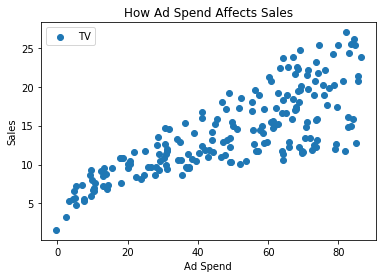

In [46]:
plt.scatter(data['TV Boxcox'], data['Sales']) # should sqrt the xs
# plt.scatter([math.log(x) for x in data['Radio']], data['Sales'])
# plt.scatter(data['Radio Boxcox'], data['Sales'])

plt.title('How Ad Spend Affects Sales')
plt.legend(['TV', 'Radio'])
plt.xlabel('Ad Spend')
plt.ylabel('Sales')

plt.show()

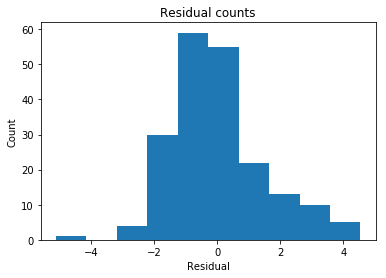

In [31]:
# Extract predicted values
new_predicted = new_regr.predict(new_X).ravel()
new_actual = data['Sales']

# Calculate the error / residual
new_residual = new_actual - new_predicted

# This looks concerning
plt.hist(new_residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

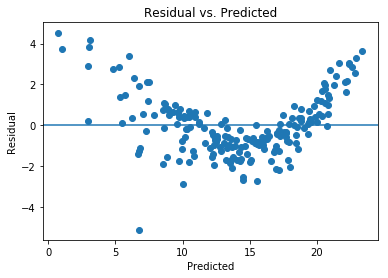

In [32]:
# Also concerning
plt.scatter(new_predicted, new_residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()